In [ ]:
#Data Scraping from Amazon using Pyhton

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.amazon.in/gp/bestsellers/books"
# Fixed the header typo and applied it to the request
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"}


def clean_price(price_str):
    #Removes ₹, commas, and converts to a float number
    if not price_str or price_str == "N/A":
        return None
    try:
        # Remove '₹', commas, and any non-numeric characters except the decimal point
        numeric_string = "".join(char for char in price_str if char.isdigit() or char == '.')
        return float(numeric_string)
    except ValueError:
        return None

response = requests.get(url, headers=headers)

if response.status_code != 200:
    print(f"Failed to retrieve page. Status code: {response.status_code}")
else:
    soup = BeautifulSoup(response.text, "html.parser")

    # Identify the container for each book
    books = soup.find_all("div", id="gridItemRoot")

    master_list = []

    for i, book in enumerate(books,start=1):
        #It performs a targeted search within HTML.
        name = book.find("div", class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")
        author = book.find("div", class_="a-row a-size-small")
        price_raw = book.find("span", class_="_cDEzb_p13n-sc-price_3mJ9Z")
        rating = book.find("span", class_="a-icon-alt")


        # Get text or "N/A"
        price_text = price_raw.text.strip() if price_raw else "N/A"

        # clean the price
        numeric_price = clean_price(price_text)

        # Create a dictionary for the books
        data = {
            "Si.No":i,
            "Name": name.text.strip() if name else "N/A",
            "Author": author.text.strip() if author else "N/A",
            "Price": numeric_price,
            "Rating": rating.text.strip() if rating else "N/A"
        }
        master_list.append(data)

    df = pd.DataFrame(master_list)
    df.to_csv("Amazon_best_seller_books_2025.csv", index=False)
    print("Scraping complete! Saved to CSV.")

Scraping complete! Saved to CSV.


In [ ]:
#Visualizing the data that is scrapped from amazon webpage

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numerical conversion (if not done already)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# For ratings, extract the first float (e.g., "4.5 out of 5 stars" -> 4.5)
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

/tmp/ipython-input-1978876514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Price", y="Name", data=top_10, palette="viridis")
/tmp/ipython-input-1978876514.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


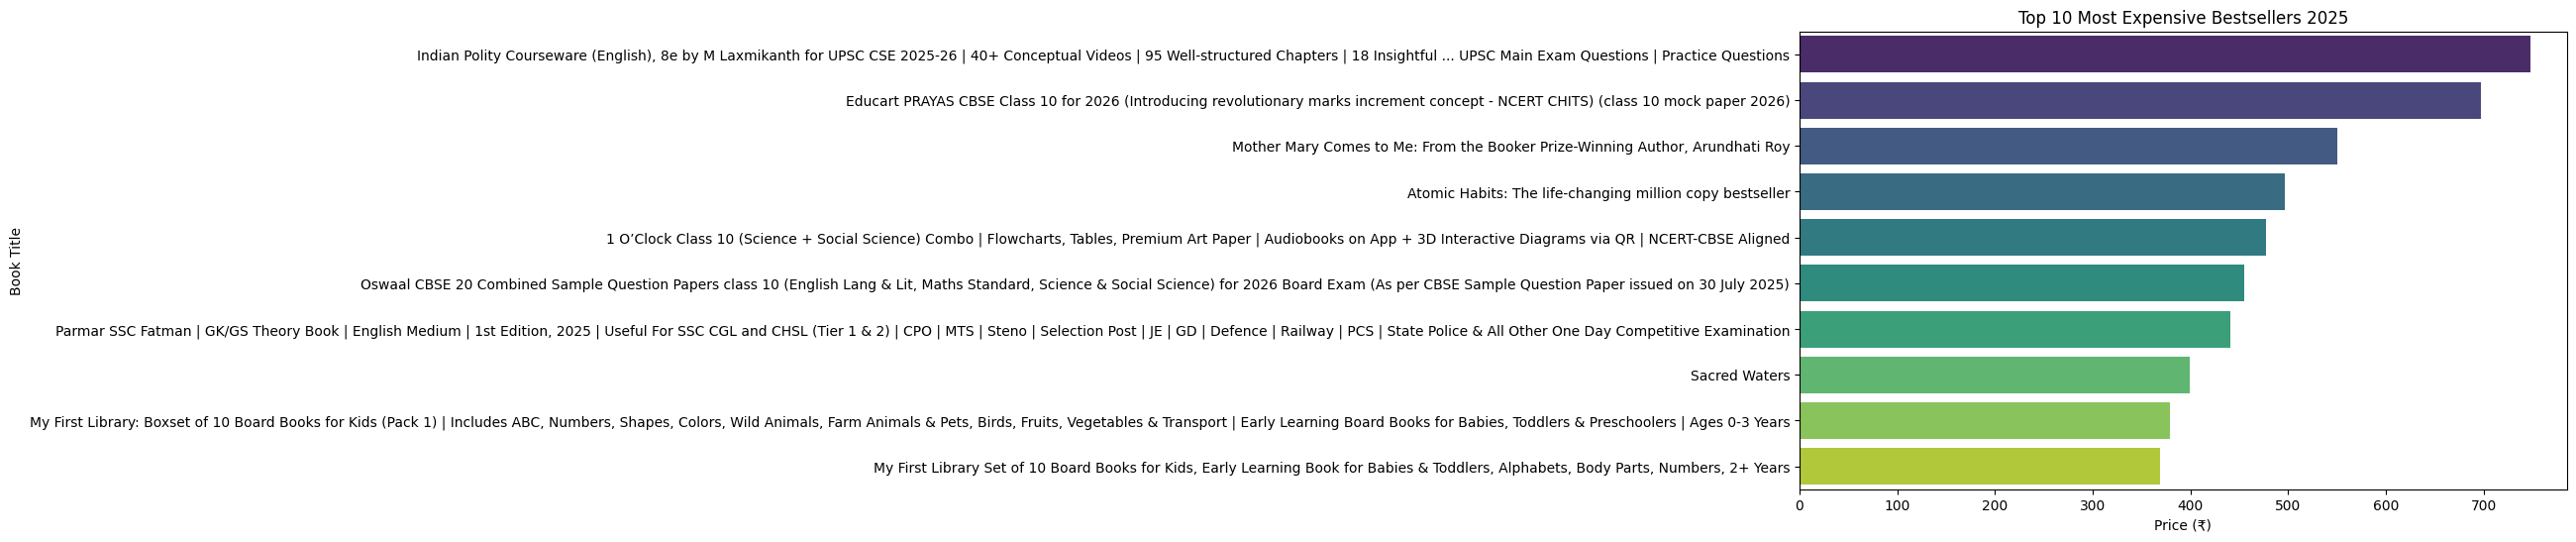

In [ ]:
# --- 1. Top 10 Most Expensive Books ---
plt.figure(figsize=(10, 6))
top_10 = df.sort_values(by="Price", ascending=False).head(10)
sns.barplot(x="Price", y="Name", data=top_10, palette="viridis")
plt.title("Top 10 Most Expensive Bestsellers 2025")
plt.xlabel("Price (₹)")
plt.ylabel("Book Title")
plt.tight_layout()
plt.savefig('top_expensive.png')

/tmp/ipython-input-242801216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="magma")


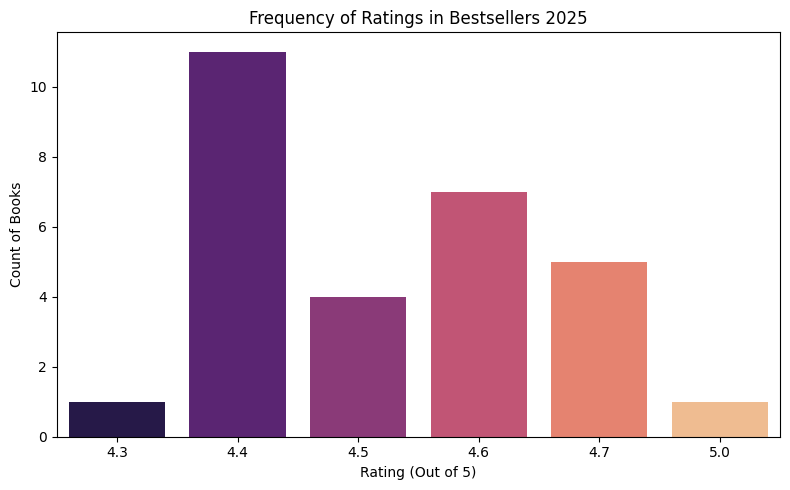

In [ ]:
# --- 2. Rating Distribution ---
plt.figure(figsize=(8, 5))
sns.countplot(x="Rating", data=df, palette="magma")
plt.title("Frequency of Ratings in Bestsellers 2025")
plt.xlabel("Rating (Out of 5)")
plt.ylabel("Count of Books")
plt.tight_layout()
plt.savefig('rating_dist.png')

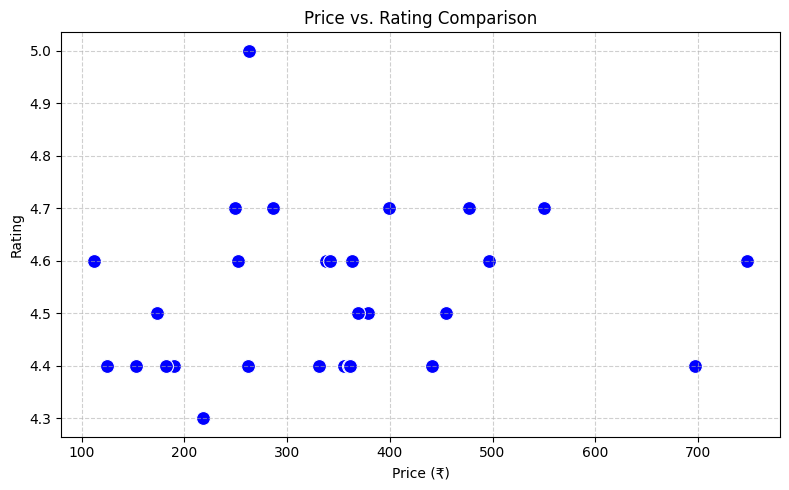

In [ ]:
# --- 3. Price vs Rating Correlation ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Price", y="Rating", data=df, color="blue", s=100)
plt.title("Price vs. Rating Comparison")
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('price_vs_rating.png')